# Laboratory Session 03

## Exercise 1
The triangular distribution, in the interval $(a, b)$, is given by the following:
$$
\begin{align}
f(X) =\left\{
\begin{array}\\
\frac{2(x − a)}{(b − a)(c − a)}, &a ≤ x < c\\
\frac{2(b − x)}{(b − a)(b − c)}. &c ≤ x ≤ b\\
0 &\text{otherwise}
\end{array}
\right.
\end{align}
$$
where $c \in [a, b]$.

In [58]:
g <- function(x,a,b,c){
    2*(x-a)/((b-a)*(c-a))*(a <= x & x < c) + 2*(b-x)/((b-a)*(b-c))*(c <= x & x <= b)
}
f <- function(x){g(x,1,3,2)}

### a) Plot the function, given the interval (a, b)

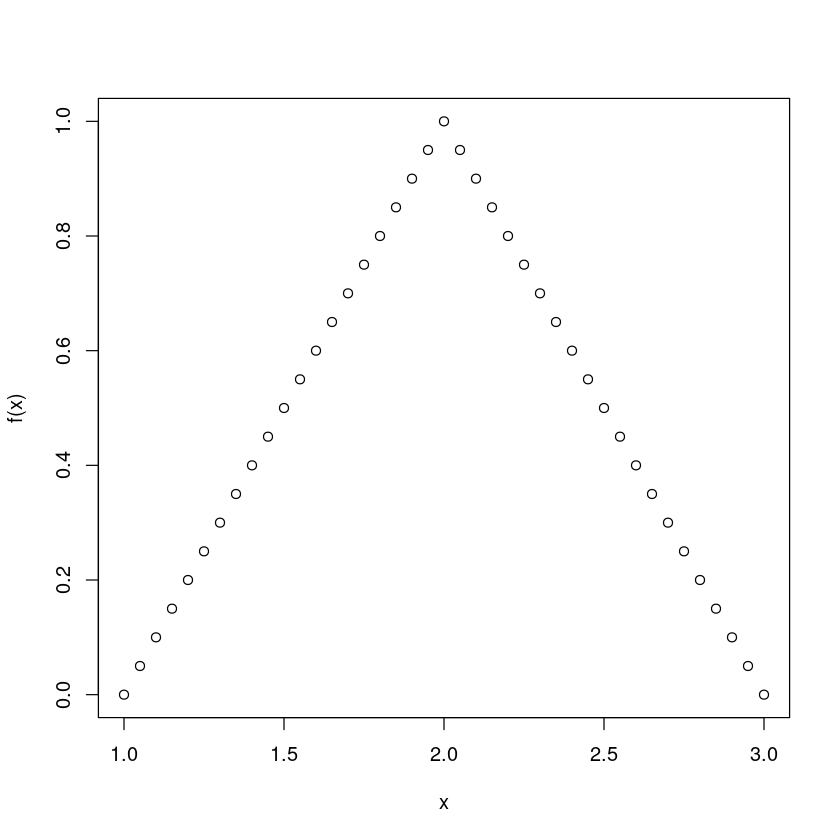

In [59]:
x <- seq(1,3,0.05)
plot(x,f(x))

### b) Write an algorithm to generate random numbers from the triangular distribution

In [68]:
# sampling by accept/reject method
sample_f <- function(f, a, b, N = 1){
    n_missing <- N
    x <- c()
    while(n_missing > 0){
        # Generate N samples
        x_n <- runif(n_missing,a,b)
        # slicer of accepted values
        accepted <- runif(n_missing) < f(x_n)
        if(any(accepted)){
            # concatenate if anything can be added.
            x <- c(x, x_n[accepted])
            n_missing <- N-length(x)
        }
    }
    return(x)
}

### c) Generate $10^4$ random numbers from the distribution, show them in an histogram and superimpose the analytical curve

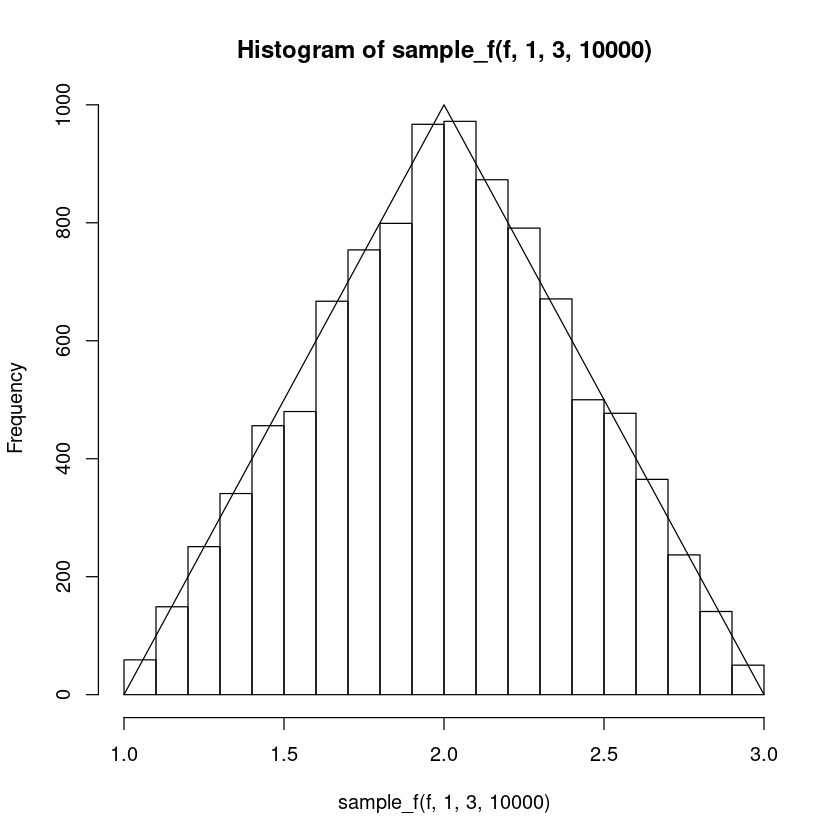

In [92]:
hist(sample_f(f,1,3,10000))
lines(x,1000*f(x))

## Markov's inequality
Markov's inequality represents an upper bound to probability distributions:
$$
\begin{align}
P(X\ge k) \le \frac{\text{E}\left[X\right]}{k},\ k>0 
\end{align}
$$
Having defined a function $G(k) \equiv 1-F(k)=P(X\ge k)$, plot $G(k)$ and the Markov's upper bound for:

### a) the exponential, Exp(λ = 1), distribution function

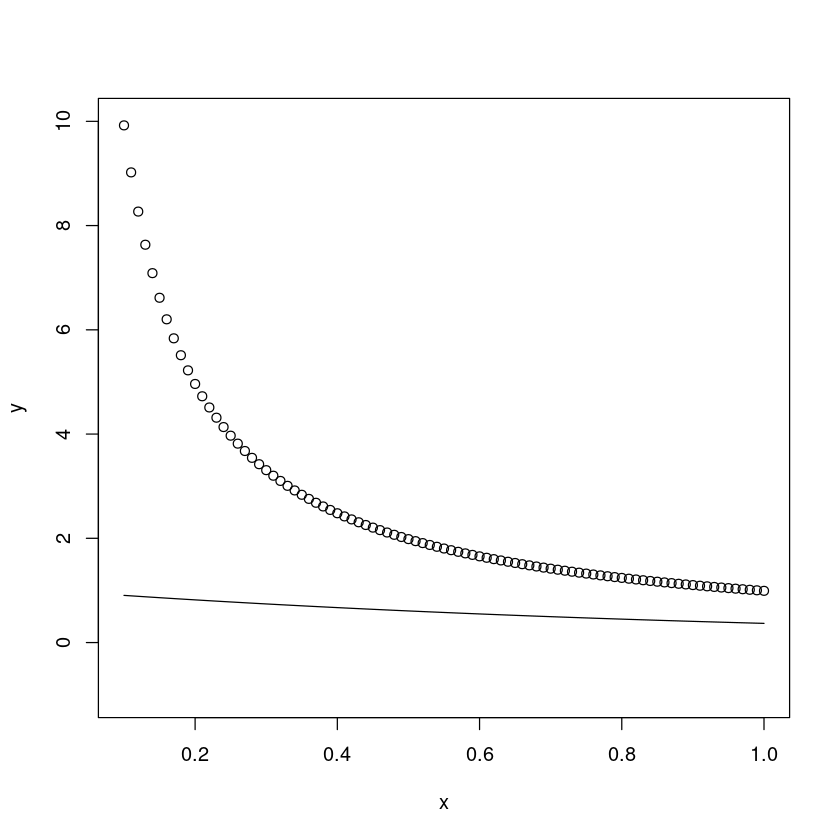

In [108]:
g_k <- function(x){1-pexp(x,1)}
avg <- mean(rexp(10000,1))
x <- seq(0.1,1,0.01)
y <- avg/x
plot(x, y, ylim = c(-1,10))
lines(x, g_k(x))

### b) the uniform, U(3, 5), distribution function

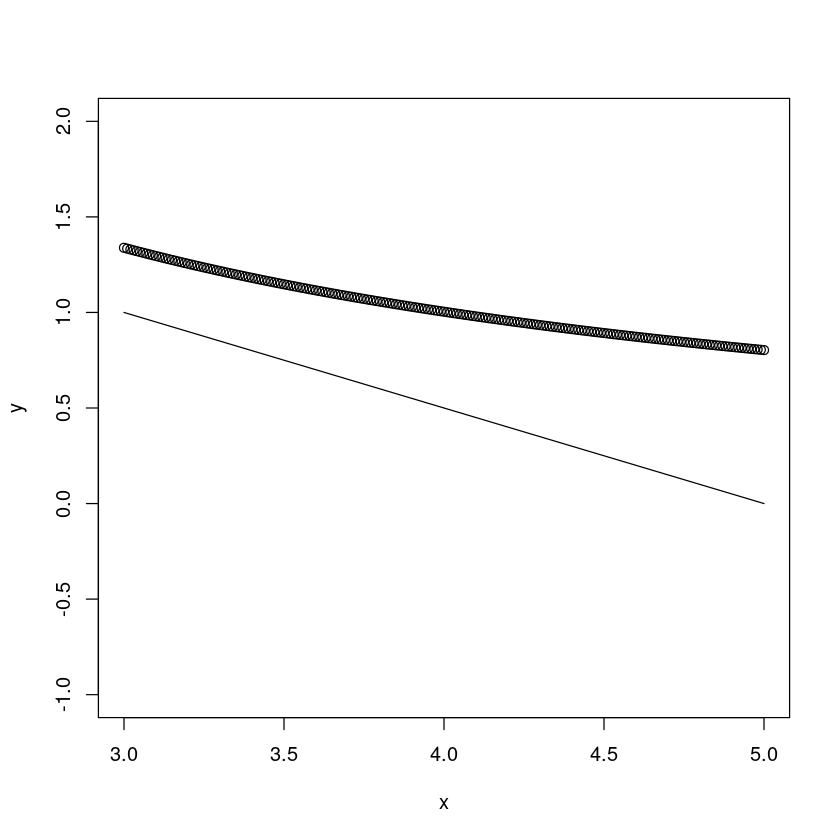

In [113]:
g_k <- function(x){1-punif(x,3,5)}
avg <- mean(runif(10000,3,5))
x <- seq(3,5,0.01)
y <- avg/x
plot(x, y, ylim = c(-1,2))
lines(x, g_k(x))

### c) the binomial, Bin(n = 1, p = 1/2), distribution function

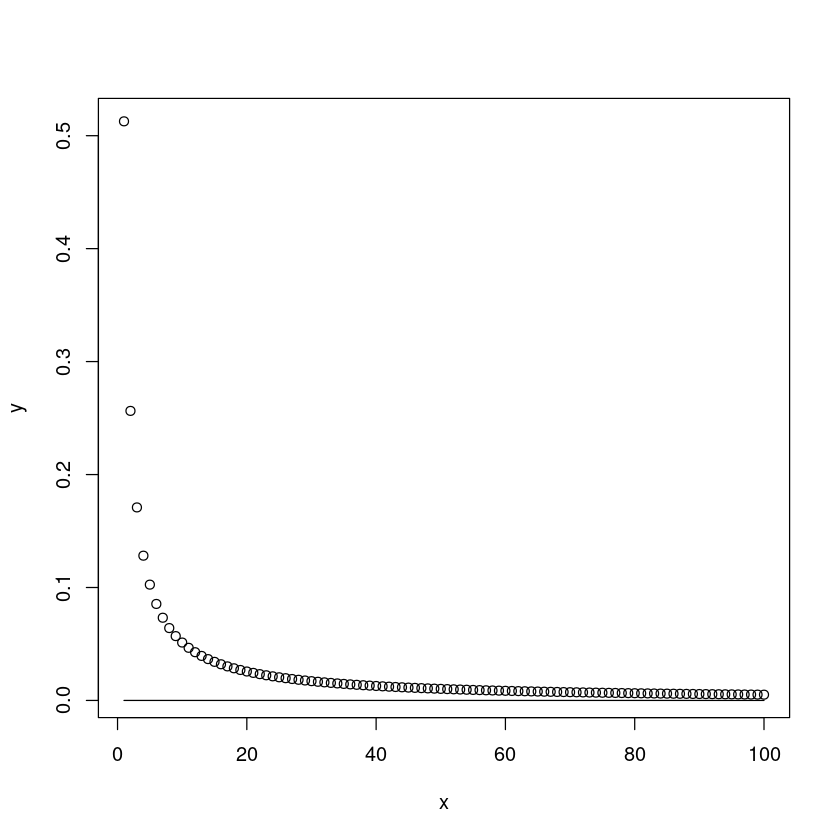

In [115]:
g_k <- function(x){1-pbinom(x,1,1/2)}
avg <- mean(rbinom(10000,1,1/2))
x <- seq(1:100)
y <- avg/x
plot(x, y)
lines(x, g_k(x))

### d) a Poisson, Pois(λ = 1/2), distribution function

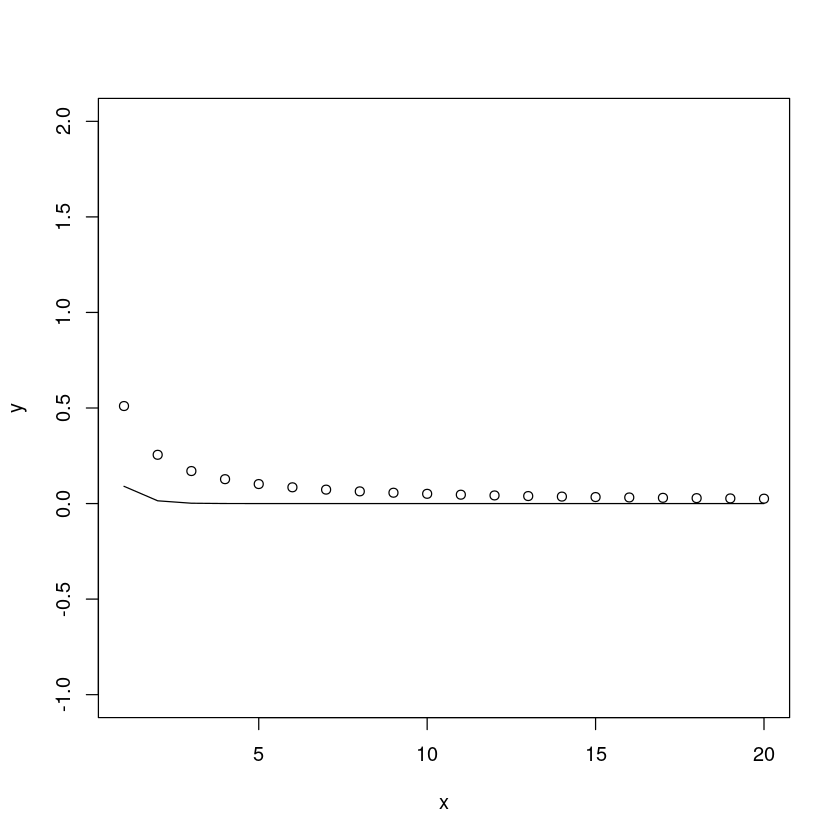

In [122]:
g_k <- function(x){1-ppois(x,1/2)}
avg <- mean(rpois(10000,1/2))
x <- seq(1:20)
y <- avg/x
plot(x, y, ylim = c(-1,2))
lines(x, g_k(x))

In [116]:
help(dpois)